<a href="https://colab.research.google.com/github/ck2979/SML312-Final-Project/blob/main/SML312_Final_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I pledge my honor that I have not violated the honor code during this assignnment. /s/ Celestine Kim

**Information about Files**

*Portfolio*

This file contains offer ids and meta data about each offer (duration, type, etc.)

id (string) - offer id

offer_type (string) - type of offer i.e. BOGO, discount, informational.

difficulty (int) - minimum required spend to complete an offer.

reward (int) - reward given for completing an offer.

duration (int) - time for offer to be open, in days.

channels (list of strings)

*Profile*

This file contains the demographic data for each customer.

age (int) - age of the customer.

became_member_on (int) - date when customer created an app account.

gender (string) - gender of the customer (note some entries contain 'O' for other rather than M or F).

id (string) - customer id.

income (float) - customer's income.

*Transcript*

This file contains records for transactions, offers received, offers viewed, and offers completed.

event (str) - record description (ie transaction, offer received, offer viewed, etc.)

person (str) - customer id.

time (int) - time in hours since the start of the test. The data begins at time t=0.

value - (dict of strings) - either an offer id or transaction amount depending on the record.

# Cleaning Data

### **Import Data**

Locate csv files in the correct google drive folder.


In [18]:
#AI CITATION_1
#AI_CITATION_2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import os

data_path = "/content/drive/MyDrive/25-26/SML312/sml312_project/project_files"

In [20]:
import pandas as pd
import os

# Load JSON files
portfolio = pd.read_json(os.path.join(data_path, "portfolio.json"), lines=True)
profile = pd.read_json(os.path.join(data_path, "profile.json"), lines=True)
transcript = pd.read_json(os.path.join(data_path, "transcript.json"), lines=True)

# Save as CSV files
portfolio.to_csv(os.path.join(data_path, "portfolio.csv"), index=False)
profile.to_csv(os.path.join(data_path, "profile.csv"), index=False)
transcript.to_csv(os.path.join(data_path, "transcript.csv"), index=False)


### **Combine and Clean DataSheets**



Convert csv files into Pandas dataframes


In [21]:
#AI CITATION_3

portfolio = pd.read_csv("/content/drive/MyDrive/25-26/SML312/sml312_project/project_files/portfolio.csv")
profile = pd.read_csv("/content/drive/MyDrive/25-26/SML312/sml312_project/project_files/profile.csv")
transcript = pd.read_csv("/content/drive/MyDrive/25-26/SML312/sml312_project/project_files/transcript.csv")

print(portfolio.head())
print(profile.head())
print(transcript.head())

   reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   
3       5            ['web', 'email', 'mobile']           5         7   
4       5                      ['web', 'email']          20        10   

      offer_type                                id  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  informational  3f207df678b143eea3cee63160fa8bed  
3           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7  
  gender  age                                id  became_member_on    income
0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2    NaN  118  

In [22]:
#CITATION: https://www.geeksforgeeks.org/pandas/how-to-rename-columns-in-pandas-dataframe/

portfolio.rename(columns={'id': 'offer_id'}, inplace=True)
print(portfolio.head())

   reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   
3       5            ['web', 'email', 'mobile']           5         7   
4       5                      ['web', 'email']          20        10   

      offer_type                          offer_id  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  informational  3f207df678b143eea3cee63160fa8bed  
3           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7  


In [23]:
profile.rename(columns={'id': 'customer_id'}, inplace=True)
print(profile.head())

  gender  age                       customer_id  became_member_on    income
0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2    NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4    NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN


In [24]:
#rename person to id
transcript.rename(columns={'person': 'id'}, inplace=True)
transcript.rename(columns={'id': 'customer_id'}, inplace=True)
print(transcript.head())

#separate value column to columns, offer_id and reward
#AI_CITATION_3
#CITATION: https://www.digitalocean.com/community/tutorials/pandas-dataframe-apply-examples
#CITATION: https://www.geeksforgeeks.org/python/python-lambda-anonymous-functions-filter-map-reduce/
#CITATION: https://www.geeksforgeeks.org/python/python-dictionary-get-method/
#CITATION: https://medium.com/@ryan_forrester_/converting-strings-to-dictionaries-in-python-b6f02989028a
#CITATION: https://stackoverflow.com/questions/25231989/how-to-check-if-a-variable-is-a-dictionary-in-python
#CITATION: https://www.programiz.com/python-programming/methods/built-in/isinstance

import ast

def to_dict(x):
    if isinstance(x, dict):
        return x
    try:
        return ast.literal_eval(x)
    except:
        return {}
transcript["value"] = transcript["value"].apply(to_dict)

def extract_offer_id(x):
    if "offer id" in x:
        return x["offer id"]
    elif "offer_id" in x:
        return x["offer_id"]
    else:
        return None

transcript["offer_id"] = transcript["value"].apply(extract_offer_id)

transcript["amount"] = transcript["value"].apply(
    lambda x: x.get("amount")
)


print(transcript.head())




                        customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  
                        customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a4955259

In [25]:
print(portfolio.head())
print(profile.head())
print(transcript.head())

   reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   
3       5            ['web', 'email', 'mobile']           5         7   
4       5                      ['web', 'email']          20        10   

      offer_type                          offer_id  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  informational  3f207df678b143eea3cee63160fa8bed  
3           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7  
  gender  age                       customer_id  became_member_on    income
0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2    NaN  118  

Merge transcript and portfolio pandas dfs



In [26]:
#merge transcript and portfolio
tp_merge = transcript.merge(
    portfolio,
    how="left",
    on="offer_id"
)
print(tp_merge.head())

                        customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0   

                           offer_id  amount  reward  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     5.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     5.0   
2  2906b810c7d4411798c6938adc9daaa5     NaN     2.0   
3  fafdcd668e3743c1bb461111dcafc2a4     NaN     2.0   
4  4d5c57ea9a6940dd891ad53e

In [27]:
#merge tp_merge with profile
full_data = tp_merge.merge(
    profile,
    how='left',
    on='customer_id'
)

print(full_data.head())

                        customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0   

                           offer_id  amount  reward  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     5.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     5.0   
2  2906b810c7d4411798c6938adc9daaa5     NaN     2.0   
3  fafdcd668e3743c1bb461111dcafc2a4     NaN     2.0   
4  4d5c57ea9a6940dd891ad53e

### **Create df (offers) for Calculating Completion Rates**

Determine if offer is completed or incomplete


In [28]:
#AI_CITATION_4
#Make dataframe (received_df) of customers that received offers
received_df = full_data[full_data["event"] == "offer received"].copy()

print(received_df.head())

                        customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0   

                           offer_id  amount  reward  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     5.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     5.0   
2  2906b810c7d4411798c6938adc9daaa5     NaN     2.0   
3  fafdcd668e3743c1bb461111dcafc2a4     NaN     2.0   
4  4d5c57ea9a6940dd891ad53e

In [29]:
#Make dataframe (completed_df) of customers that completed offers
#Select only for customer_id and offer_id
#CITAITON: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
#Drop duplicates (customers make have completed same offer multiple times)
#CITAITON: https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-drop_duplicates/

completed_df = full_data[full_data["event"] == "offer completed"][["customer_id", "offer_id"]].drop_duplicates()

#Mark all completed rows as completed in a completed column
#compelted = 1, not completed = 0
completed_df["completed"] = 1
print(completed_df.head())

                            customer_id                          offer_id  \
12658  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  2906b810c7d4411798c6938adc9daaa5   
12672  fe97aa22dd3e48c8b143116a8403dd52  fafdcd668e3743c1bb461111dcafc2a4   
12679  629fc02d56414d91bca360decdfa9288  9b98b8c7a33c4b65b9aebfe6a799e6d9   
12692  676506bad68e4161b9bbaffeb039626b  ae264e3637204a6fb9bb56bc8210ddfd   
12697  8f7dd3b2afe14c078eb4f6e6fe4ba97d  4d5c57ea9a6940dd891ad53e9dbe8da0   

       completed  
12658          1  
12672          1  
12679          1  
12692          1  
12697          1  


Merge received_df and completed_df to offers

In [30]:
#AI_CITATION_5
offers = received_df.merge(
  completed_df,
  on = ["customer_id", "offer_id"],
  how = "left"
)
offers["completed"] = offers["completed"].fillna(0).astype(int)

print(offers.head())

                        customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0   

                           offer_id  amount  reward  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     5.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     5.0   
2  2906b810c7d4411798c6938adc9daaa5     NaN     2.0   
3  fafdcd668e3743c1bb461111dcafc2a4     NaN     2.0   
4  4d5c57ea9a6940dd891ad53e

# EDA

### **Print Head, Tail, and Describe for 'offers' df**

In [31]:
print(offers.head())

                        customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0   

                           offer_id  amount  reward  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     5.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     5.0   
2  2906b810c7d4411798c6938adc9daaa5     NaN     2.0   
3  fafdcd668e3743c1bb461111dcafc2a4     NaN     2.0   
4  4d5c57ea9a6940dd891ad53e

In [32]:
print(offers.tail())

                            customer_id           event  \
76272  d087c473b4d247ccb0abfef59ba12b0e  offer received   
76273  cb23b66c56f64b109d673d5e56574529  offer received   
76274  6d5f3a774f3d4714ab0c092238f3a1d7  offer received   
76275  9dc1421481194dcd9400aec7c9ae6366  offer received   
76276  e4052622e5ba45a8b96b59aba68cf068  offer received   

                                                  value  time  \
76272  {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}   576   
76273  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}   576   
76274  {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}   576   
76275  {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}   576   
76276  {'offer id': '3f207df678b143eea3cee63160fa8bed'}   576   

                               offer_id  amount  reward  \
76272  ae264e3637204a6fb9bb56bc8210ddfd     NaN    10.0   
76273  2906b810c7d4411798c6938adc9daaa5     NaN     2.0   
76274  2298d6c36e964ae4a3e7e9706d1fb8c2     NaN     3.0   
76275  ae264e36372

In [33]:
print(offers.describe())

               time  amount        reward    difficulty      duration  \
count  76277.000000     0.0  76277.000000  76277.000000  76277.000000   
mean     332.579519     NaN      4.201607      7.707723      6.503704   
std      196.489548     NaN      3.398888      5.538203      2.201544   
min        0.000000     NaN      0.000000      0.000000      3.000000   
25%      168.000000     NaN      2.000000      5.000000      5.000000   
50%      408.000000     NaN      5.000000     10.000000      7.000000   
75%      504.000000     NaN      5.000000     10.000000      7.000000   
max      576.000000     NaN     10.000000     20.000000     10.000000   

                age  became_member_on         income     completed  
count  76277.000000      7.627700e+04   66501.000000  76277.000000  
mean      62.524457      2.016705e+07   65371.618472      0.471925  
std       26.762620      1.168818e+04   21623.288473      0.499214  
min       18.000000      2.013073e+07   30000.000000      0.000000

### correlation heatmaps

correlation heatmap << make a df of just the features in question (numerical values) to assess multicolinnearity

make second heatmap with features and target (completion) to assess completion


this shows that these features are not very helpful

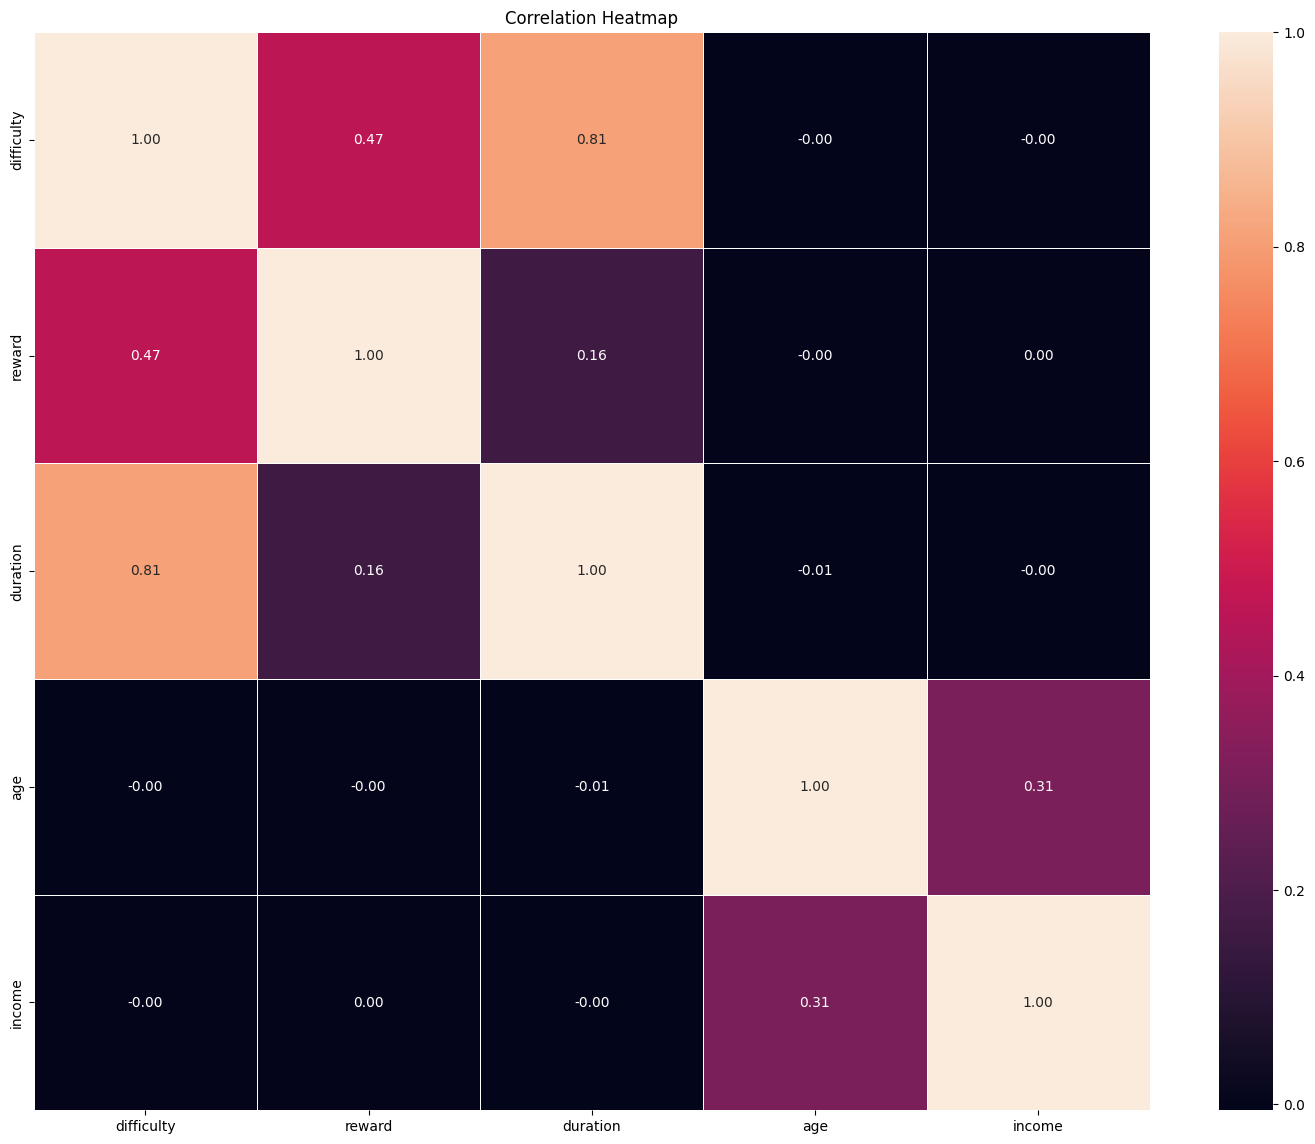

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_data = offers[["difficulty", "reward", "duration", "age", "income"]]
X = offers[["difficulty", "reward", "duration", "age", "income"]]
y = offers["completed"]

corr_data.corr()
plt.figure(figsize=(18, 14))
heatmap = sns.heatmap(X.corr(), linewidths=0.5,fmt=".2f", annot=True, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

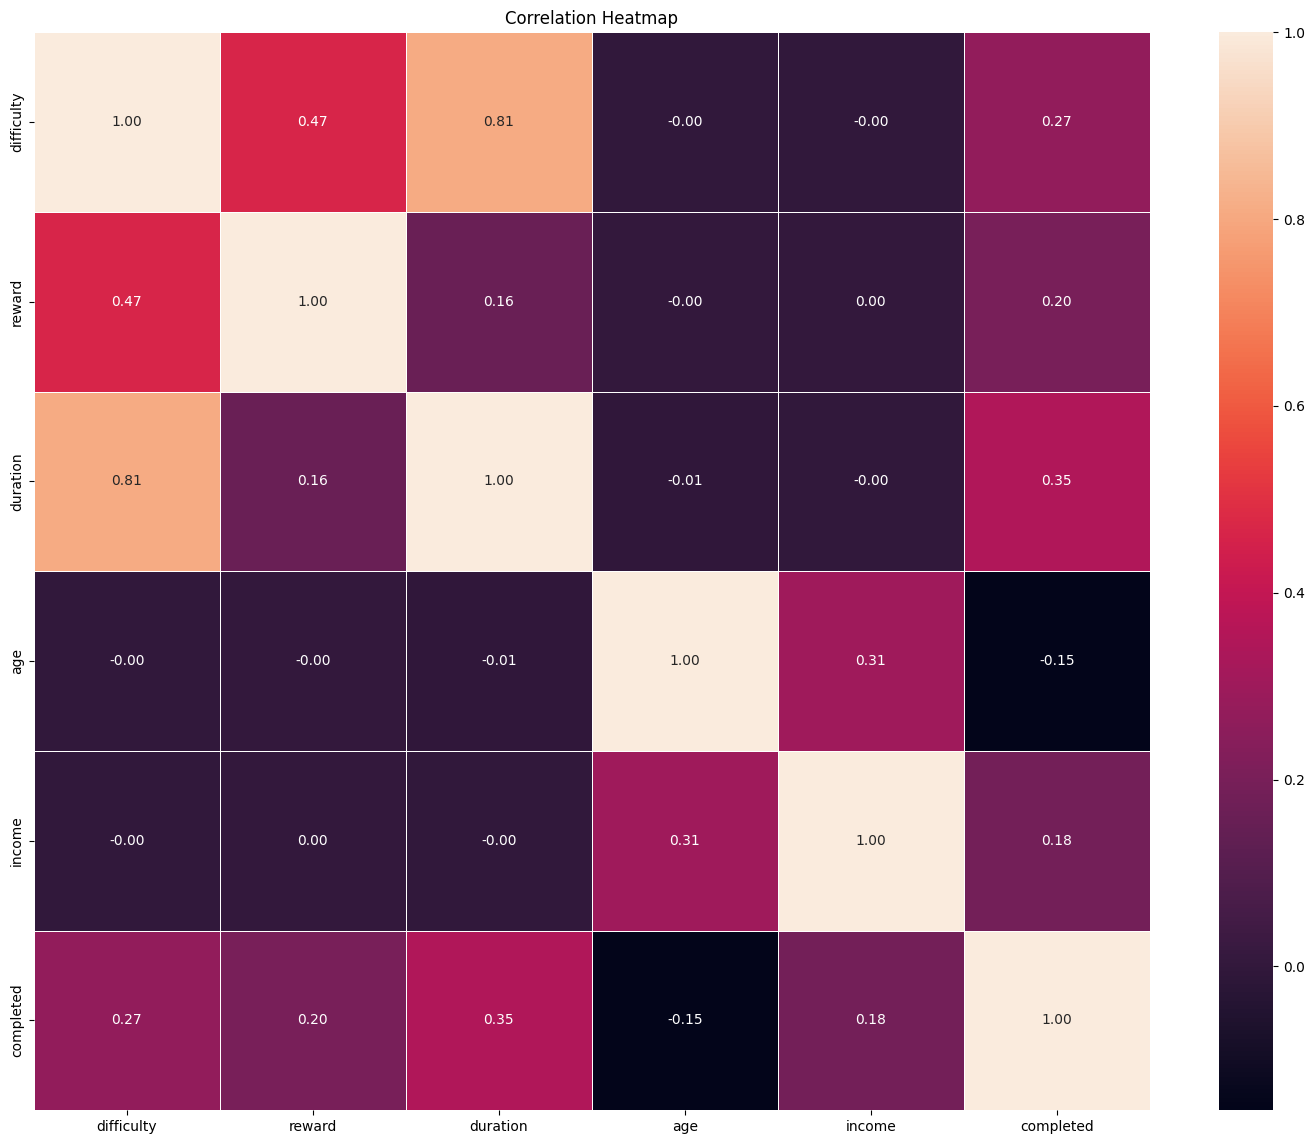

In [35]:
corr_data_2 = offers[["difficulty", "reward", "duration", "age", "income", "completed"]]
corr_data_2.corr()
plt.figure(figsize=(18, 14))
heatmap = sns.heatmap(corr_data_2.corr(), linewidths=0.5,fmt=".2f", annot=True, cbar=True)
plt.title("Correlation Heatmap")
plt.show()




### Plots of completed offers per offer type

In [36]:
completed_counts = (
    offers.groupby("offer_type")
          .agg(
              num_completed=("completed", "sum"),
              total_offers=("completed", "count")
          )
          .reset_index()
)

completed_counts["num_incompleted"] = completed_counts["total_offers"] - completed_counts["num_completed"]

#melt into long format
#CITATION: https://www.geeksforgeeks.org/python/python-pandas-melt/

plot_data = completed_counts.melt(
    id_vars="offer_type",
    value_vars=["num_completed", "num_incompleted"],
    var_name="status",
    value_name="count"
)
#rename variables
plot_data["status"] = plot_data["status"].map({
    "num_completed": "Completed",
    "num_incompleted": "Incompleted"
})


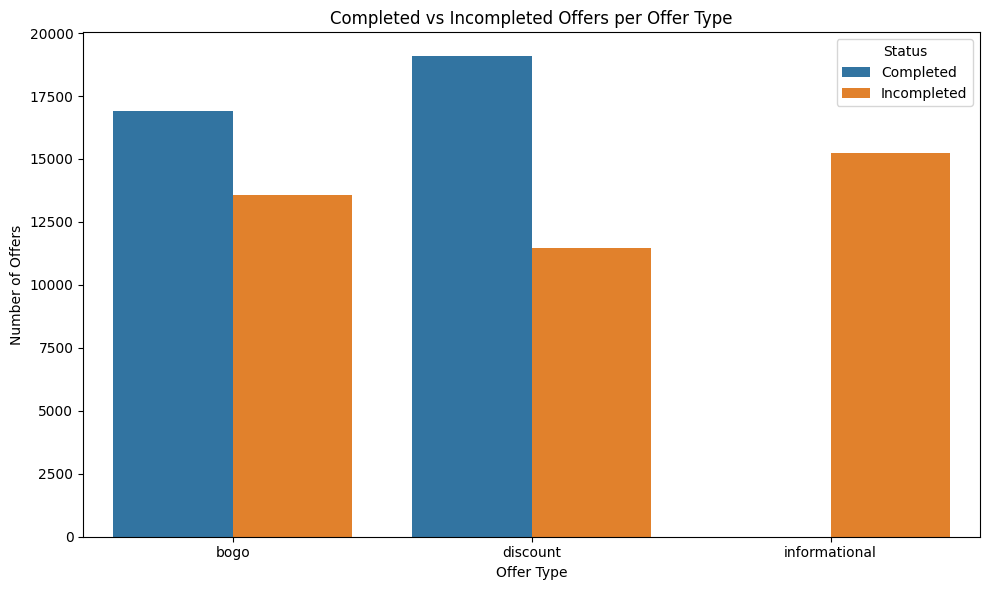

In [37]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="offer_type",
    y="count",
    hue="status",
    data=plot_data,
)

plt.title("Completed vs Incompleted Offers per Offer Type")
plt.xlabel("Offer Type")
plt.ylabel("Number of Offers")

plt.legend(title="Status")
plt.tight_layout()
plt.show()

### bar plot completion rate by offer_type

---



In [38]:
#CITATION: https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/
#CITATION: https://stackoverflow.com/questions/54912626/python-renaming-pandas-dataframe-columns
completion_rate = (
    offers.groupby("offer_type")["completed"]
    .mean()
    .reset_index()
    .rename(columns={"completed": "completion_rate"}))

print(completion_rate)



      offer_type  completion_rate
0           bogo         0.554838
1       discount         0.624529
2  informational         0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

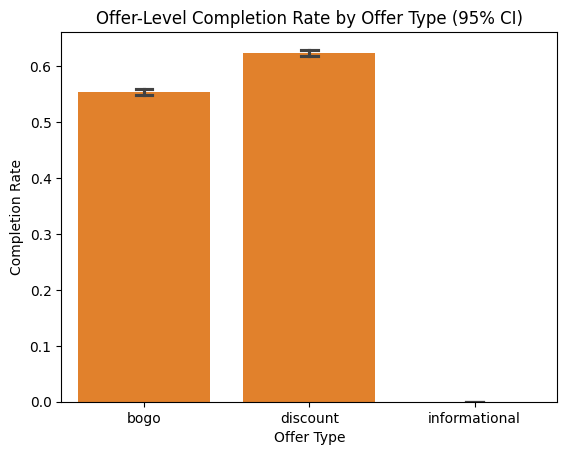

In [39]:
#CITATION: https://seaborn.pydata.org/generated/seaborn.barplot.html

cplot=sns.barplot(completion_rate, x="offer_type", y="completion_rate", legend=True)
cplot.set_title("Completion Rate by Offer Type")

#barplot with offers df to have Seaborn compute the CI
sns.barplot(
    data=offers,
    x="offer_type",
    y="completed",
    errorbar=("ci", 95),
    capsize=0.1,
)
plt.title("Offer-Level Completion Rate by Offer Type (95% CI)")
plt.xlabel("Offer Type")
plt.ylabel("Completion Rate")

plt.show





#Create ML_df for use in modelling

In [40]:
ML_df = offers.merge(
    profile,
    on="customer_id",
    how="left"
)

print(ML_df)

                            customer_id           event  \
0      78afa995795e4d85b5d9ceeca43f5fef  offer received   
1      a03223e636434f42ac4c3df47e8bac43  offer received   
2      e2127556f4f64592b11af22de27a7932  offer received   
3      8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4      68617ca6246f4fbc85e91a2a49552598  offer received   
...                                 ...             ...   
76272  d087c473b4d247ccb0abfef59ba12b0e  offer received   
76273  cb23b66c56f64b109d673d5e56574529  offer received   
76274  6d5f3a774f3d4714ab0c092238f3a1d7  offer received   
76275  9dc1421481194dcd9400aec7c9ae6366  offer received   
76276  e4052622e5ba45a8b96b59aba68cf068  offer received   

                                                  value  time  \
0      {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1      {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2      {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3      {'offer id': 'fafdcd668e

In [41]:
#remove duplicate gender and membership date columns
ML_df = ML_df.drop(columns=["gender_x", "age_x", "income_x", "became_member_on_x"])

ML_df = ML_df.rename(columns={
    "gender_y": "gender",
    "age_y": "age",
    "income_y": "income",
    "became_member_on_y": "became_member_on"
})

print(ML_df)

                            customer_id           event  \
0      78afa995795e4d85b5d9ceeca43f5fef  offer received   
1      a03223e636434f42ac4c3df47e8bac43  offer received   
2      e2127556f4f64592b11af22de27a7932  offer received   
3      8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4      68617ca6246f4fbc85e91a2a49552598  offer received   
...                                 ...             ...   
76272  d087c473b4d247ccb0abfef59ba12b0e  offer received   
76273  cb23b66c56f64b109d673d5e56574529  offer received   
76274  6d5f3a774f3d4714ab0c092238f3a1d7  offer received   
76275  9dc1421481194dcd9400aec7c9ae6366  offer received   
76276  e4052622e5ba45a8b96b59aba68cf068  offer received   

                                                  value  time  \
0      {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1      {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2      {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3      {'offer id': 'fafdcd668e

one hot encode in ML_df for gender and offer type

In [42]:

#CITATION: https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/
#CITATION: https://www.geeksforgeeks.org/machine-learning/encoding-before-vs-after-train_test_split/
#CITATION: https://tracyrenee61.medium.com/loop-through-rows-and-columns-to-impute-missing-values-in-python-70a384f7075c
ML_df = pd.get_dummies(
    ML_df,
    columns=["offer_type", "gender"],
    drop_first=True
)

print(ML_df)

                            customer_id           event  \
0      78afa995795e4d85b5d9ceeca43f5fef  offer received   
1      a03223e636434f42ac4c3df47e8bac43  offer received   
2      e2127556f4f64592b11af22de27a7932  offer received   
3      8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4      68617ca6246f4fbc85e91a2a49552598  offer received   
...                                 ...             ...   
76272  d087c473b4d247ccb0abfef59ba12b0e  offer received   
76273  cb23b66c56f64b109d673d5e56574529  offer received   
76274  6d5f3a774f3d4714ab0c092238f3a1d7  offer received   
76275  9dc1421481194dcd9400aec7c9ae6366  offer received   
76276  e4052622e5ba45a8b96b59aba68cf068  offer received   

                                                  value  time  \
0      {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1      {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2      {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3      {'offer id': 'fafdcd668e

find membership_length from became_member_on

In [43]:
#CITATION: https://www.geeksforgeeks.org/python/python-pandas-to_datetime/
#CITATION: https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe
ML_df["became_member_on"] = pd.to_datetime(ML_df["became_member_on"], format = "%Y%m%d")

max_date = ML_df["became_member_on"].max()

ML_df["membership_length"] = (max_date - ML_df["became_member_on"]).dt.days

print(ML_df[["became_member_on", "membership_length"]])


      became_member_on  membership_length
0           2017-05-09                443
1           2017-08-04                356
2           2018-04-26                 91
3           2017-09-25                304
4           2017-10-02                297
...                ...                ...
76272       2016-10-23                641
76273       2018-05-05                 82
76274       2018-06-04                 52
76275       2016-03-07                871
76276       2017-07-22                369

[76277 rows x 2 columns]


In [44]:
print(ML_df.columns)


Index(['customer_id', 'event', 'value', 'time', 'offer_id', 'amount', 'reward',
       'channels', 'difficulty', 'duration', 'completed', 'age',
       'became_member_on', 'income', 'offer_type_discount',
       'offer_type_informational', 'gender_M', 'gender_O',
       'membership_length'],
      dtype='object')


###Split and Scale ML_df

group features together for X

In [45]:
features = [
    "difficulty",
    "reward",
    "age",
    "income",
    "membership_length",
    "gender_M",
    "gender_O",
    "offer_type_discount",
    "offer_type_informational"
]

label X and y

In [46]:
X = ML_df[features]
y = ML_df["completed"]

account for missing values

In [47]:
X = X.fillna(X.median(numeric_only=True))

Split into Train/Test sets

In [48]:
#CITATION: https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Scale

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#EDA on ML_df

###Completion rates by age, income, gender groups

In [50]:
#completion rate by age group
age_groups = pd.cut(ML_df.age, bins=[0,30,45,60,100])

age_df = ML_df.groupby(age_groups, observed=False)["completed"].mean().reset_index()
age_df.columns = ["Age_Group", "Completion_Rate"]

print(age_df)
#completion rate by income bracket (divided into four)
income_groups = pd.qcut(ML_df.income, q=4)

income_df = ML_df.groupby(income_groups, observed=False)["completed"].mean().reset_index()
income_df.columns = ["Income_Group", "Completion_Rate"]

print(income_df)
#completion rate by gender
gender_results = {
    "Male": ML_df.loc[ML_df.gender_M == 1, "completed"].mean(),
    "Other": ML_df.loc[ML_df.gender_O == 1, "completed"].mean(),
    "Female": ML_df.loc[(ML_df.gender_M == 0) & (ML_df.gender_O == 0), "completed"].mean()
}

gender_df = pd.DataFrame(list(gender_results.items()), columns=["Gender", "Completion_Rate"])
print(gender_df)

   Age_Group  Completion_Rate
0    (0, 30]         0.413892
1   (30, 45]         0.483328
2   (45, 60]         0.542275
3  (60, 100]         0.552027
           Income_Group  Completion_Rate
0  (29999.999, 49000.0]         0.389933
1    (49000.0, 64000.0]         0.493062
2    (64000.0, 80000.0]         0.562207
3   (80000.0, 120000.0]         0.647015
   Gender  Completion_Rate
0    Male         0.465236
1   Other         0.567686
2  Female         0.476418


In [51]:
print("Completion by Age Group:")
display(age_df)

print("\nCompletion by Income Group:")
display(income_df)

print("\nCompletion by Gender:")
display(gender_df)

Completion by Age Group:


,Age_Group,Completion_Rate
0,"(0, 30]",0.413892
1,"(30, 45]",0.483328
2,"(45, 60]",0.542275
3,"(60, 100]",0.552027



Completion by Income Group:


,Income_Group,Completion_Rate
0,"(29999.999, 49000.0]",0.389933
1,"(49000.0, 64000.0]",0.493062
2,"(64000.0, 80000.0]",0.562207
3,"(80000.0, 120000.0]",0.647015



Completion by Gender:


,Gender,Completion_Rate
0,Male,0.465236
1,Other,0.567686
2,Female,0.476418


# Logistic Regression - Classification
Predicting whether a customer will complete an offer

*Logistic Regression with Lasso Regression (L1 Regularization)*

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

#CITATION: https://medium.com/@rajjyotiroy15/the-power-of-logistic-regression-in-feature-selection-a-deep-dive-into-efficient-data-science-27e81292ef51
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Fit Logistic Regression model
log_reg_L1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000)
log_reg_L1.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg_L1.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Feature selection using the absolute value of the coefficients
feature_importance = np.abs(log_reg_L1.coef_[0])
feature_names = X.columns

# Creating a DataFrame to show feature importance
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg_L1.coef_[0],
    'Absolute Coefficient': feature_importance
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted features
print("\nFeature Importance based on Logistic Regression coefficients:")
print(feature_df)

# Optional: Select the top N features
top_n = 10

top_features = feature_df.head(top_n)
print(f"Feature Absolute Coeffients from L1 Regularization:")
display(top_features)

Accuracy: 76.08%

Feature Importance based on Logistic Regression coefficients:
                    Feature  Coefficient  Absolute Coefficient
8  offer_type_informational    -4.364695              4.364695
2                       age    -0.612829              0.612829
3                    income     0.612340              0.612340
4         membership_length     0.488303              0.488303
0                difficulty    -0.468820              0.468820
7       offer_type_discount     0.285538              0.285538
5                  gender_M    -0.187306              0.187306
1                    reward    -0.105859              0.105859
6                  gender_O     0.046964              0.046964
Feature Absolute Coeffients from L1 Regularization:


,Feature,Coefficient,Absolute Coefficient
8,offer_type_informational,-4.364695,4.364695
2,age,-0.612829,0.612829
3,income,0.612340,0.612340
4,membership_length,0.488303,0.488303
0,difficulty,-0.468820,0.468820
7,offer_type_discount,0.285538,0.285538
5,gender_M,-0.187306,0.187306
1,reward,-0.105859,0.105859
6,gender_O,0.046964,0.046964


*Logistic Regression with Ridge Regression (L2 Regularization)*

Training ROC AUC (Logistic Regression): 0.8434366866950619
Testing ROC AUC (Logistic Regression): 0.8442244479614918


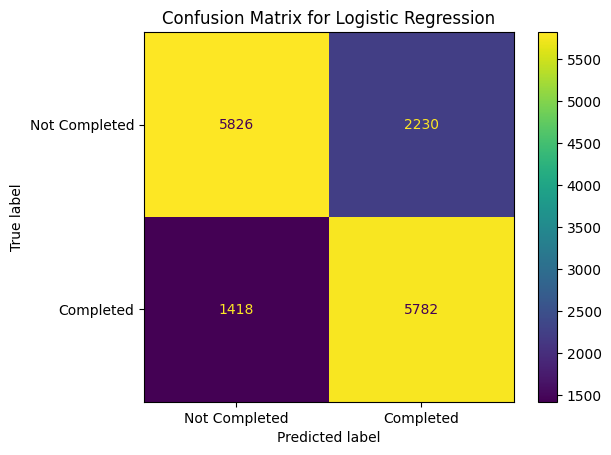

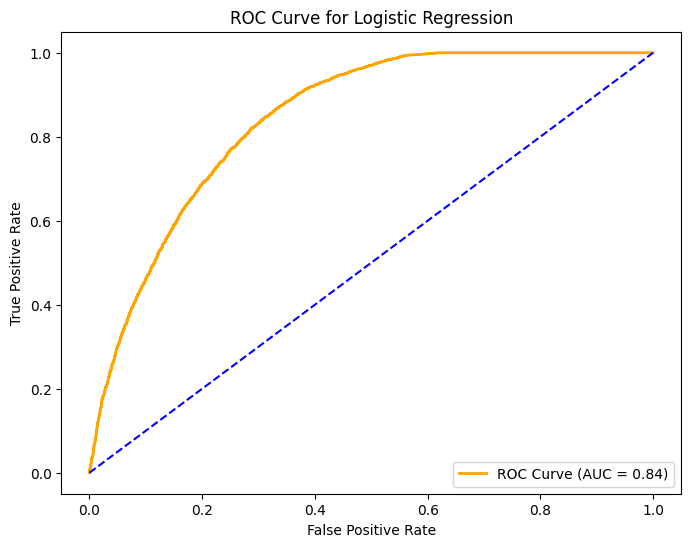

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

#Train Logistic Regression
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

#Test Predictions
y_pred = log_reg.predict(X_test_scaled)

#Confusion Matrix
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Not Completed", "Completed"])
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")

#Logistic Regression ROC AUC
y_prob = log_reg.predict_proba(X_train_scaled)[:, 1]
roc_auc = roc_auc_score(y_train, y_prob)
print('Training ROC AUC (Logistic Regression):', roc_auc)

y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print('Testing ROC AUC (Logistic Regression):', roc_auc)

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
#Plotting ROC AUC
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [54]:
#Logistic Regression Feature Importance and Coefficients
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#CITATION: https://www.w3schools.com/python/python_ml_logistic_regression.asp
#AI_CITATION_6

coefficient = log_reg.coef_[0]

coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficient
}).sort_values(by='Coefficient', ascending=False)

print(coefficients_df)

odds_ratio_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficient,
    'Odds_Ratio': np.exp(coefficient)
}).sort_values(by='Odds_Ratio', ascending=False)

print(odds_ratio_df)
display(odds_ratio_df)

                    Feature  Coefficient
3                    income     0.612005
4         membership_length     0.488439
7       offer_type_discount     0.283602
6                  gender_O     0.046806
1                    reward    -0.107781
5                  gender_M    -0.187415
0                difficulty    -0.467222
2                       age    -0.612801
8  offer_type_informational    -4.105483
                    Feature  Coefficient  Odds_Ratio
3                    income     0.612005    1.844126
4         membership_length     0.488439    1.629770
7       offer_type_discount     0.283602    1.327905
6                  gender_O     0.046806    1.047918
1                    reward    -0.107781    0.897825
5                  gender_M    -0.187415    0.829099
0                difficulty    -0.467222    0.626741
2                       age    -0.612801    0.541831
8  offer_type_informational    -4.105483    0.016482


,Feature,Coefficient,Odds_Ratio
3,income,0.612005,1.844126
4,membership_length,0.488439,1.629770
7,offer_type_discount,0.283602,1.327905
6,gender_O,0.046806,1.047918
1,reward,-0.107781,0.897825
5,gender_M,-0.187415,0.829099
0,difficulty,-0.467222,0.626741
2,age,-0.612801,0.541831
8,offer_type_informational,-4.105483,0.016482


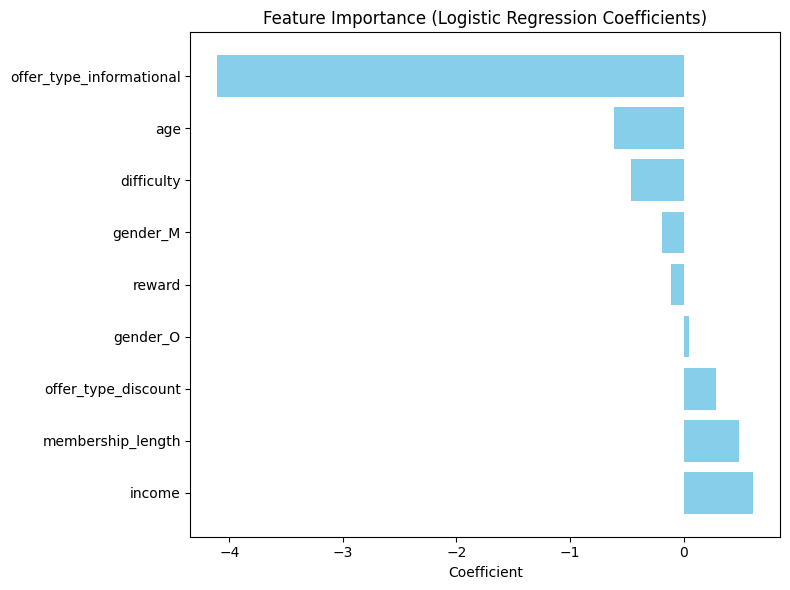

In [55]:
plt.figure(figsize=(8,6))
plt.barh(
    y=coefficients_df["Feature"],
    width=coefficients_df["Coefficient"],
    color="skyblue"
)
plt.xlabel("Coefficient")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.tight_layout()
plt.show()

# K-Nearest Neighbors - Classification
Predicting whether a customer will complete an offer

Training ROC AUC (KNN): 0.9398070036681796
Testing ROC AUC (KNN): 0.8648587577926734


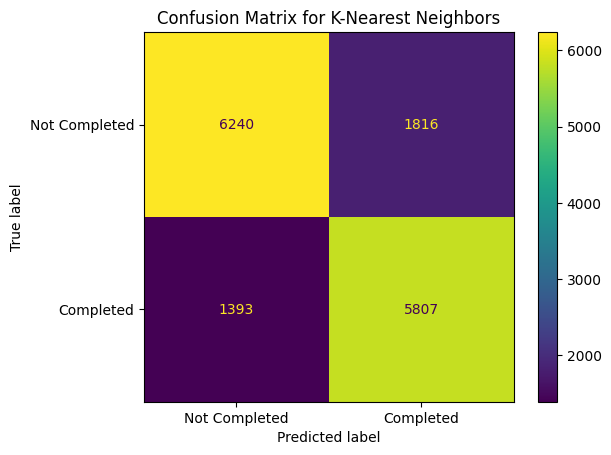

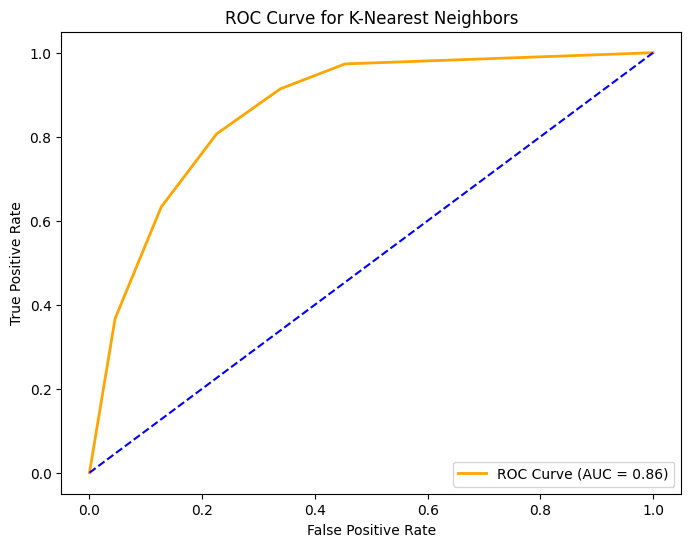

In [56]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

#Train KNN
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#Test Predictions
y_pred_knn = knn.predict(X_test_scaled)
#Train Predictions
y_pred_train_knn = knn.predict(X_train_scaled)

#Confusion Matrix
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm1 = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=["Not Completed", "Completed"])
disp.plot()
plt.title("Confusion Matrix for K-Nearest Neighbors")

#Finding ROC AUC (training)
from sklearn.metrics import roc_auc_score
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

#Nearest Neighbors ROC AUC
y_prob = knn.predict_proba(X_train_scaled)[:, 1]
roc_auc = roc_auc_score(y_train, y_prob)
print('Training ROC AUC (KNN):', roc_auc)

y_prob = knn.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print('Testing ROC AUC (KNN):', roc_auc)

#Plotting ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

In [57]:
from sklearn.inspection import permutation_importance

results_list = []

result = permutation_importance(
      knn, X_test_scaled, y_test,
      scoring='roc_auc', n_repeats=5, random_state=1234
  )
permutation_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_Std': result.importances_std
})

permutation_df_sorted = permutation_df.sort_values(
    by='Importance_Mean', ascending=False
)

display(permutation_df_sorted.head(5))

,Feature,Importance_Mean,Importance_Std
8,offer_type_informational,0.141304,0.001753
4,membership_length,0.079880,0.001681
2,age,0.078721,0.001710
3,income,0.066858,0.002613
5,gender_M,0.032354,0.001383


# Random Forest - Classification
Predicting whether a customer will complete an offer

Training ROC AUC (Random Forests): 0.9983573909561224
Testing ROC AUC (Random Forests): 0.9112735504248041


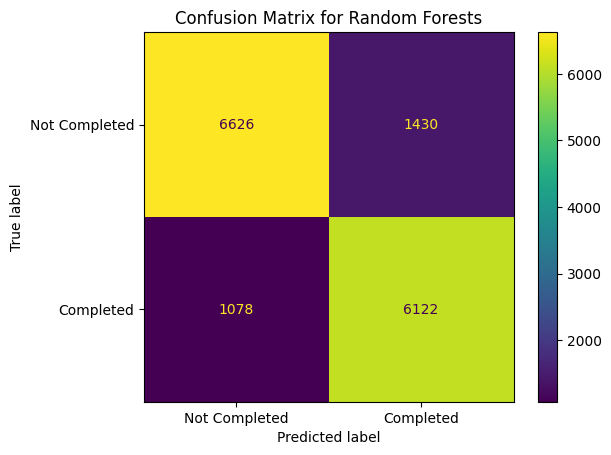

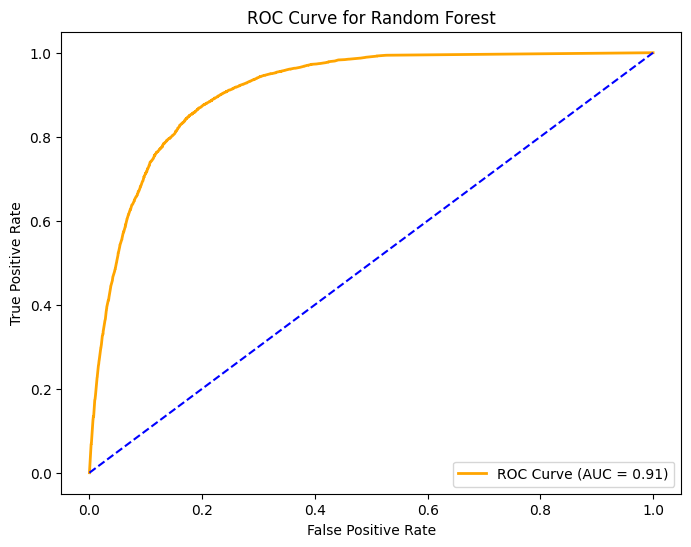

In [58]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Train Random Forest
#CITATION: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

#Train Predictions
y_pred_train_rfc = rfc.predict(X_train)
#Test Predictions
y_pred_rfc = rfc.predict(X_test)

#Confusion Matrix
cm6 = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,
                              display_labels=["Not Completed", "Completed"])
disp.plot()
plt.title("Confusion Matrix for Random Forests")

#Random Forests ROC AUC
y_prob = rfc.predict_proba(X_train)[:, 1]
roc_auc = roc_auc_score(y_train, y_prob)
print('Training ROC AUC (Random Forests):', roc_auc)

y_prob = rfc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print('Testing ROC AUC (Random Forests):', roc_auc)

#Plotting ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

                    Feature  Importance
4         membership_length    0.314661
2                       age    0.224296
3                    income    0.171440
1                    reward    0.113835
0                difficulty    0.088351
8  offer_type_informational    0.060763
5                  gender_M    0.014943
7       offer_type_discount    0.009816
6                  gender_O    0.001896


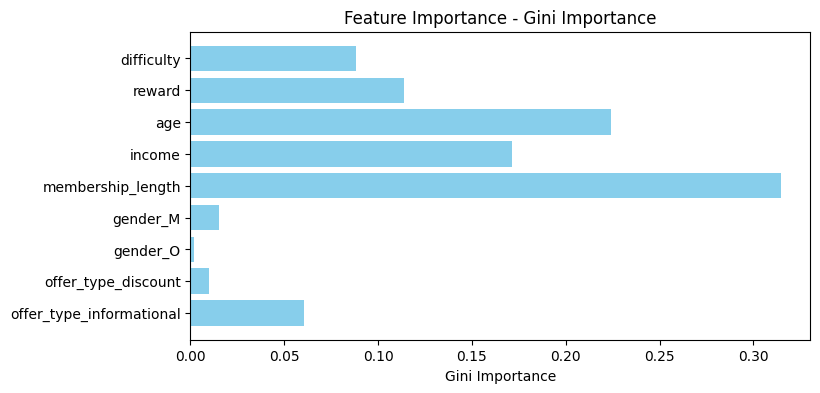

,Feature,Importance
4,membership_length,0.314661
2,age,0.224296
3,income,0.171440
1,reward,0.113835
0,difficulty,0.088351
8,offer_type_informational,0.060763
5,gender_M,0.014943
7,offer_type_discount,0.009816
6,gender_O,0.001896


In [59]:
#Random Forest Feature Importance - Bar Plot
#CITATION: https://www.geeksforgeeks.org/machine-learning/feature-importance-with-random-forests/
importances = rfc.feature_importances_

feature_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_imp_df)
#bar plot of gini feature importance for training set
plt.figure(figsize=(8, 4))
plt.barh(X_train.columns, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()
plt.show()

display(feature_imp_df)


# Segmentation / Completion Rates of Top Feature Groups

Completion length by membership group

In [60]:
#completion rate by membership group
ML_df["membership_group"] = pd.cut(
    ML_df["membership_length"],
    bins=[0, 180, 365, 730, ML_df["membership_length"].max()],
    labels=["0–6 months", "6–12 months", "1–2 years", "2+ years"]
)
membership_df = (
    ML_df
    .groupby("membership_group", observed=False)["completed"]
    .mean()
    .reset_index()
)
membership_df.columns = ["Membership_Length_Group", "Completion_Rate"]

print(membership_df)

  Membership_Length_Group  Completion_Rate
0              0–6 months         0.299097
1             6–12 months         0.401322
2               1–2 years         0.616219
3                2+ years         0.570889


Reconstruct one-hot encoded offer_type for use in segmenting

In [61]:
ML_df["offer_type_reconstructed"] = "bogo"
ML_df.loc[ML_df["offer_type_discount"] ==1, "offer_type_"] = "discount"
ML_df.loc[ML_df["offer_type_informational"] == 1, "offer_type_"] = "informational"

Segmented/Grouped completion rate for membership_group and offer_type

In [62]:
completion_by_segment = (
    ML_df
    .groupby(["membership_group", "offer_type_"], observed=False)["completed"]
    .mean()
    .reset_index()
)

display(completion_by_segment)

,membership_group,offer_type_,completed
0,0–6 months,discount,0.392874
1,0–6 months,informational,0.000000
2,6–12 months,discount,0.527932
3,6–12 months,informational,0.000000
4,1–2 years,discount,0.802058
5,1–2 years,informational,0.000000
6,2+ years,discount,0.774123
7,2+ years,informational,0.000000


Segmented/Grouped completion rate for age groups and offer_type




In [63]:
#Add Age_Group as a column in ML_df

ML_df["Age_Group"] = pd.cut(
    ML_df["age"],
    bins=[0, 30, 45, 60,100],
    labels = ["0–30", "31–45", "46–60", "61+"]
)

completion_by_segment_2 = (
    ML_df
    .groupby(["Age_Group", "offer_type_"], observed=False)["completed"]
    .mean()
    .reset_index()
)

display(completion_by_segment_2)

,Age_Group,offer_type_,completed
0,0–30,discount,0.566238
1,0–30,informational,0.000000
2,31–45,discount,0.637526
3,31–45,informational,0.000000
4,46–60,discount,0.703687
5,46–60,informational,0.000000
6,61+,discount,0.721293
7,61+,informational,0.000000


Segmented/Grouped completion rate for age groups and offer_type


In [64]:
#Add Income_Group as a column in ML_df

ML_df["Income_Group"] = pd.qcut(
    ML_df["income"],
    q=4,
    labels = ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"]
)

completion_by_segment_3 = (
    ML_df
    .groupby(["Income_Group", "offer_type_"], observed=False)["completed"]
    .mean()
    .reset_index()
)

display(completion_by_segment_3)

,Income_Group,offer_type_,completed
0,Low Income,discount,0.540734
1,Low Income,informational,0.000000
2,Lower-Middle Income,discount,0.652940
3,Lower-Middle Income,informational,0.000000
4,Upper-Middle Income,discount,0.725792
5,Upper-Middle Income,informational,0.000000
6,High Income,discount,0.822499
7,High Income,informational,0.000000
